In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
color_img = np.asarray(Image.open(rf"C:\Users\User\Desktop\project-initiation-steps.webp"))
gray_img = np.mean(color_img, axis=2).astype(np.uint8)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(color_img)
ax[1].imshow(gray_img, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\project-initiation-steps.webp'

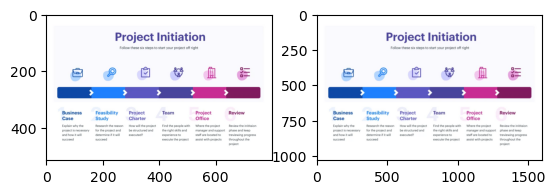

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(rf"C:\Users\User\Desktop\project-initiation-steps.webp")
img2 = cv2.resize(img, None, fx=2, fy=2)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

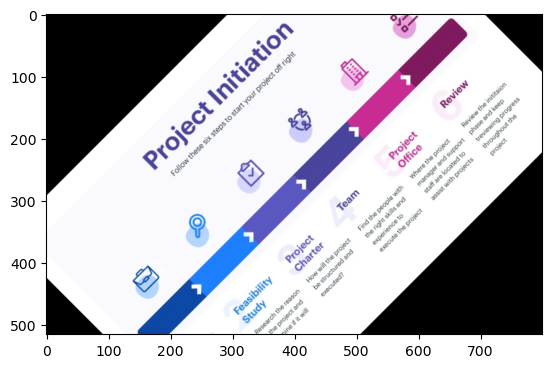

In [ ]:
# cv2.warpAffine(img,M,dsize[,dst[flags[,borderMode[,borderValue]]]])

# cv2.getRotationMatrix2D(center, angle,scale)

img = cv2.imread(rf"C:\Users\User\Desktop\project-initiation-steps.webp")
height, width = img.shape[:2]
center = (width // 2, height // 2)
angle = 45 # Rotate by 45 degrees
scale = 1.0 # No scaling
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))


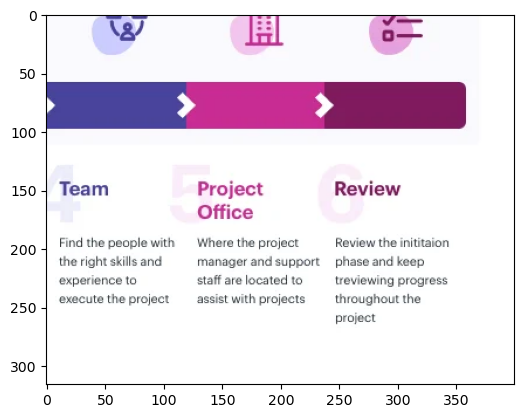

In [ ]:
# FLIP 
# flip(src, flipCode[,dst])

# Slice 

img = cv2.imread(rf"C:\Users\User\Desktop\project-initiation-steps.webp")

# Define the region of interest (ROI) - arbitrary coordinates
x_start, y_start, x_end, y_end = 400, 200, 850, 700 # Adjust as needed

# Crop the image using slicing
cropped_img = img[y_start:y_end, x_start:x_end]

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))


In [ ]:
import cv2
import matplotlib.pyplot as plt
def show_histogram(hsv):
    h, s, v = cv2.split(hsv)
    hist = cv2.calcHist([v], [0], None, [255], [0, 255])
    ax = plt.subplot(2, 1, 2)
    ax.plot(hist)
    ax = plt.subplot(2, 1, 1)
    ax.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
    plt.show()
# https://st2.depositphotos.com/4164031/6455/i/450/depositphotos_64554493-stock-photopanoramic-sunrise.jpg
img = cv2.imread(rf"C:\Users\User\Desktop\depositphotos_64554493-stock-photo-panoramic-sunrise.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show_histogram(hsv)

h, s, v = cv2.split(hsv)
v_norm = cv2.normalize(v, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
img_norm = cv2.merge((h, s, v_norm))
show_histogram(img_norm)

error: OpenCV(4.11.0) D:\bld\libopencv_1745417703801\work\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


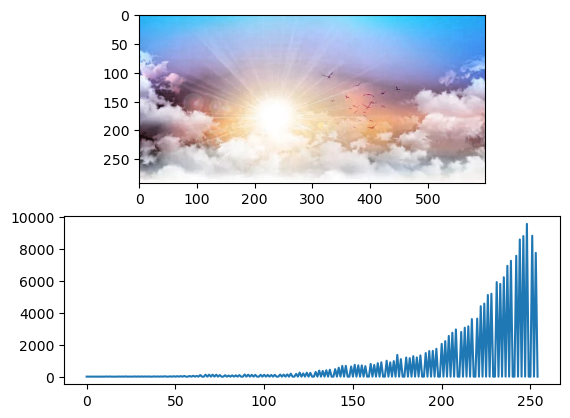

In [ ]:
h, s, v = cv2.split(hsv)
v_norm = cv2.normalize(v, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
img_norm = cv2.merge((h, s, v_norm))
show_histogram(img_norm)

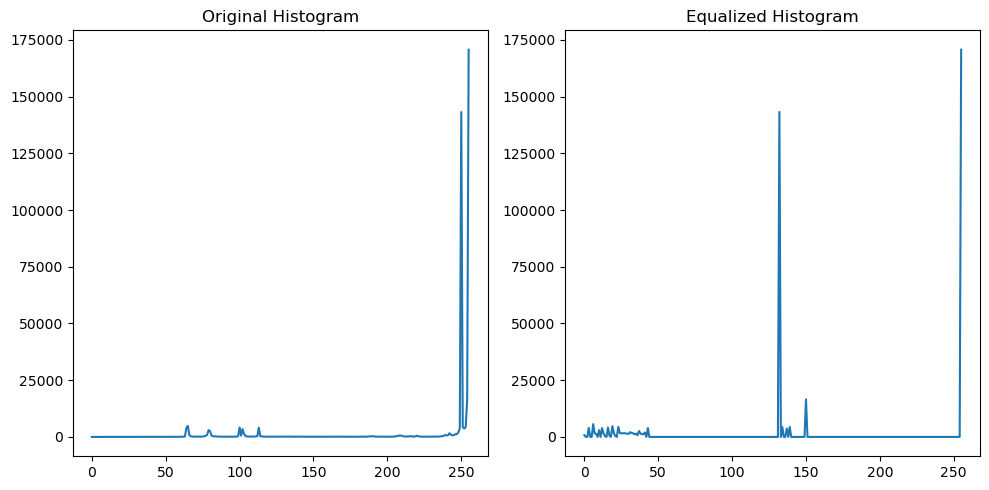

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1) 그레이스케일로 이미지 로드
img = cv2.imread(r"C:\Users\User\Desktop\project-initiation-steps.webp", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("이미지를 찾을 수 없습니다. 경로를 확인하세요.")

# 2) 히스토그램 평활화
img_equalized = cv2.equalizeHist(img)

# 3) 히스토그램 계산 (범위는 0~256)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0, 256])

# 4) 플롯 그리기 (figsize 오타 수정)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.title('Original Histogram')
plt.subplot(1, 2, 2)
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.tight_layout()
plt.show()


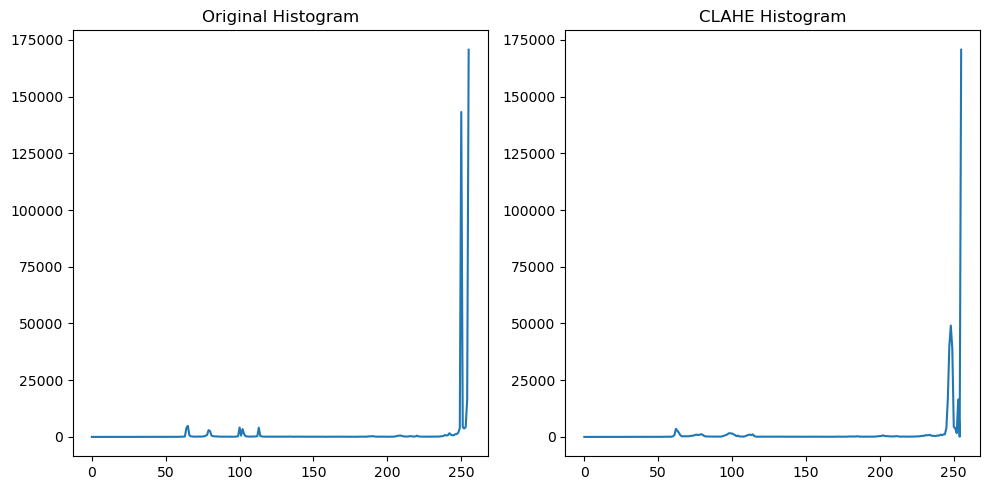

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1) 그레이스케일로 이미지 로드
img = cv2.imread(r"C:\Users\User\Desktop\project-initiation-steps.webp", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("이미지를 찾을 수 없습니다. 경로를 확인하세요.")

# 2) CLAHE (Contrast Limited AHE) 적용
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
img2 = clahe.apply(img)

# 3) 히스토그램 계산 (0~256 범위로)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

# 4) 플롯 그리기
plt.figure(figsize=(10, 5))
for i, h in enumerate([hist, hist2]):
    plt.subplot(1, 2, i+1)
    plt.plot(h)
    plt.title('Original Histogram' if i == 0 else 'CLAHE Histogram')
plt.tight_layout()
plt.show()


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sbaghbidi/human-faces-object-detection")

print("Path to dataset files:", path)

100%|██████████| 498M/498M [01:15<00:00, 6.97MB/s] 

Extracting files...


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\sbaghbidi\human-faces-object-detection\versions\1


In [56]:
import os
import cv2
import pandas as pd

# 1) 경로 설정
data_dir      = r"C:\Users\User\.cache\kagglehub\datasets\sbaghbidi\human-faces-object-detection\versions\1"
csv_path      = os.path.join(data_dir, "faces.csv")
img_folder    = os.path.join(data_dir, "images")
processed_dir = os.path.join(data_dir, "processed_faces")
os.makedirs(processed_dir, exist_ok=True)

# 2) CSV 읽기
df = pd.read_csv(csv_path)
print("📋 Columns:", df.columns.tolist())

# 3) 컬럼명 직접 지정
img_col    = "image_name"  # 이미지 파일명
x_min_col  = "x0"          # 왼쪽 상단 X
y_min_col  = "y0"          # 왼쪽 상단 Y
x_max_col  = "x1"          # 오른쪽 하단 X
y_max_col  = "y1"          # 오른쪽 하단 Y

# 4) 얼굴 영역만 잘라내기
for _, row in df.iterrows():
    img_name = row[img_col]
    img_path = os.path.join(img_folder, img_name)
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠ Unable to load {img_name}")
        continue

    x1, y1 = int(row[x_min_col]), int(row[y_min_col])
    x2, y2 = int(row[x_max_col]), int(row[y_max_col])
    face = img[y1:y2, x1:x2]

    # (선택) 224×224로 리사이즈
    face = cv2.resize(face, (224, 224))

    out_path = os.path.join(processed_dir, img_name)
    cv2.imwrite(out_path, face)

print("✅ Done! 모든 얼굴 이미지를 잘라내어 저장했습니다.")


📋 Columns: ['image_name', 'width', 'height', 'x0', 'y0', 'x1', 'y1']
✅ Done! 모든 얼굴 이미지를 잘라내어 저장했습니다.


In [57]:
import os
import cv2
import pandas as pd
import numpy as np  # for padding

# 1) 경로 설정은 이전과 동일
data_dir      = r"C:\Users\User\.cache\kagglehub\datasets\sbaghbidi\human-faces-object-detection\versions\1"
csv_path      = os.path.join(data_dir, "faces.csv")
img_folder    = os.path.join(data_dir, "images")
processed_dir = os.path.join(data_dir, "processed_faces")
os.makedirs(processed_dir, exist_ok=True)

df = pd.read_csv(csv_path)
img_col    = "image_name"
x_min_col  = "x0"; y_min_col = "y0"
x_max_col  = "x1"; y_max_col = "y1"

TARGET = 224

for _, row in df.iterrows():
    img_name = row[img_col]
    img = cv2.imread(os.path.join(img_folder, img_name))
    if img is None: continue

    # 1) 얼굴 크롭
    x1, y1 = int(row[x_min_col]), int(row[y_min_col])
    x2, y2 = int(row[x_max_col]), int(row[y_max_col])
    face = img[y1:y2, x1:x2]

    # 2) 비율 유지해 크기 조정
    h, w = face.shape[:2]
    scale = min(TARGET / w, TARGET / h)
    new_w, new_h = int(w * scale), int(h * scale)
    face_resized = cv2.resize(face, (new_w, new_h))

    # 3) 패딩으로 중앙에 배치
    canvas = np.zeros((TARGET, TARGET, 3), dtype=np.uint8)
    x_off = (TARGET - new_w) // 2
    y_off = (TARGET - new_h) // 2
    canvas[y_off:y_off+new_h, x_off:x_off+new_w] = face_resized

    # 4) 저장
    cv2.imwrite(os.path.join(processed_dir, img_name), canvas)

print("✅ Done! Aspect-ratio 유지하며 저장되었습니다.")


✅ Done! Aspect-ratio 유지하며 저장되었습니다.
